<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/fall_2025_iub/content/lessons/04_digging_further_into_data_wrangling/04_estimating_building_height.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exercise: Estimating Building Height with Pressure

This exercise aims to build on your knowledge of the big-four data science libraries to use Kestrel atmospheric measurement devices to estimate the height difference between the ground floor and sixth floor of the Geology building.

## Background

Air pressure monotonically decreases with height in the atmosphere.  This is simply due to the fact that *air pressure is a measure of the weight of everything above*.  So higher up in the atmosphere there is less atmosphere (weight) above, and pressure decreases.

One of the basic principles of fluid dynamics is that a *pressure gradient*--a change in pressure over some distance--exerts a net force on the fluid that, in the absence of other forces, would cause the fluid to move.  So why then does the atmosphere not flow away to space in response to this pressure gradient?

To a very good approximation, the atmosphere is in *hydrostatic balance*, meaning that the vertical pressure gradient is balanced by the force of gravity on the air; gravity effectively nullifies the vertical pressure gradient force.  This leads to one of the most essential equations in atmospheric science:

$$ \frac{\partial p}{\partial z} = -\rho g$$

where $p$ is the atmospheric pressure, $z$ is height away from the surface, $\rho$ is air density, and $g$ is the gravitational acceleration (we'll use $g \approx 9.806~\text{m s}^{-2}$ here).

If we combine this with the ideal gas law (written in a form that is convenient for atmospheric gasses, where $R_d \approx 287~\text{J kg}^{-1}\text{K}^{-1}$ represents a constant for air with the composition of Earth's atmosphere), we get a differential equation for pressure.

$$\text{Ideal gas law: }~p = \rho R_d T \to $$

$$ \frac{\partial p}{\partial z} = - \frac{p g}{R_d T} $$

We can approximate the derivatives in this equation using finite differences: $\partial p/\partial z \to \Delta p / \Delta z$, where $\Delta$ represents a (presumably small) difference between two pressure or height measurements.  We can then use this to solve for the change in height as a function of changes in pressure:

$$ \Delta z \approx - \frac{R_d T}{g} \frac{\Delta p}{p}$$

## Estimating height

Now imagine that we have a device that records pressure and temperature every second or so.  If you take that device and walk up a set of stairs, the recorded pressure will drop a bit for every second that you're ascending.  A pair of measurements taken at consecutive times can be used to estimate $\Delta p$, and the average of the two measurements can be used to estimate $p$ and $T$ over tha same time frame.  These values can be plugged in to the above formula to estimate the change in height between the two measurements.  The sum of all the changes in height then gives an estimate of the total change in height; we will have numerically integrated the differential equation that comes from combining hydrostatic balance and the ideal gas law.

### Instructions

1. form groups of two or three
1. acquaint yourself with the Kestrel measuring devices, and pair it to at least one of your phones using [Kestrel Link](https://kestrelinstruments.com/link-connectivity)
1. ensure that you can record measurements and export them to csv
1. take the kestrel device down to the ground floor of the Geology building; go to the lobby
1. start recording
1. either walk up the stairwell, or take the elevator, up to the 7th floor (you can only access this floor from the western stairwell)
1. end recording
1. export the data to a CSV file and add it to your course git folder (into a folder for lesson 04)
1. estimate the difference in height between the two floors using the method above (*hint*: you should use `pandas`, and you should be able to make a new column for the calculation of $\Delta p$ and $\Delta z$ for each measurement, and then use the `.sum()` method)

```{note}
If for some reason you need a data file to work with, here is the one used in the solution: [WEATHER_-_2414781_Sep_15_2023_2_56_14_PM.csv](https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/refs/heads/fall_2025_iub/content/lessons/04_digging_further_into_data_wrangling/WEATHER_-_2414781_Sep_15_2023_2_56_14_PM.csv)
```

In [1]:
""" Import libraries """
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [2]:
""" Read the data file. """
# set the file name
data_file = "EAS_-_2497726_Sep_19,_2025___2_46_30_PM.csv"

# read the data file
#kestrel_pd = pd.read_csv(data_file, skiprows=2)
kestrel_pd = pd.read_csv(data_file,skiprows = [0,1,2,4], 
                         parse_dates=[0])
# show part of the data frame
kestrel_pd.head()

C:\Users\rafaq\AppData\Local\Temp\ipykernel_30732\1638889227.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  kestrel_pd = pd.read_csv(data_file,skiprows = [0,1,2,4],


,FORMATTED DATE_TIME,Temperature,Relative Humidity,Station Pressure,Heat Index,Dew Point,Density Altitude,Data Type,Record name,Start time,Duration (H:M:S),Location description,Location address,Location coordinates,Notes
0,2025-09-19 14:45:06,72.5,40.3,29.22,70.7,47.0,1824,session,"Session - Sep 19, 2025_2:46:30 PM","Sep 19, 2025 / 2:45:02 PM",00:01:28,NaN,NaN,NaN,NaN
1,2025-09-19 14:45:11,72.6,40.0,29.22,70.7,46.9,1826,session,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-09-19 14:45:16,72.9,40.9,29.21,71.2,47.8,1858,session,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-09-19 14:45:21,73.1,43.2,29.21,71.4,49.4,1881,session,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-09-19 14:45:26,72.6,41.6,29.21,70.9,48.0,1844,session,NaN,NaN,NaN,NaN,NaN,NaN,NaN


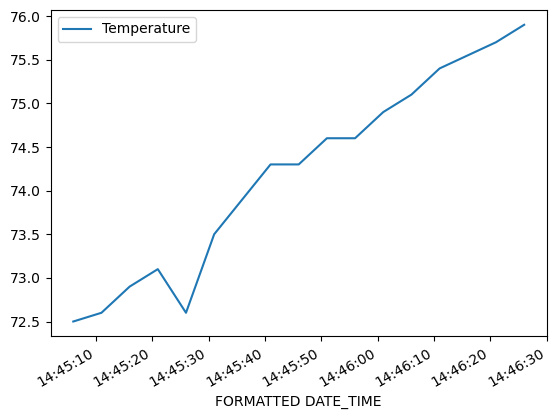

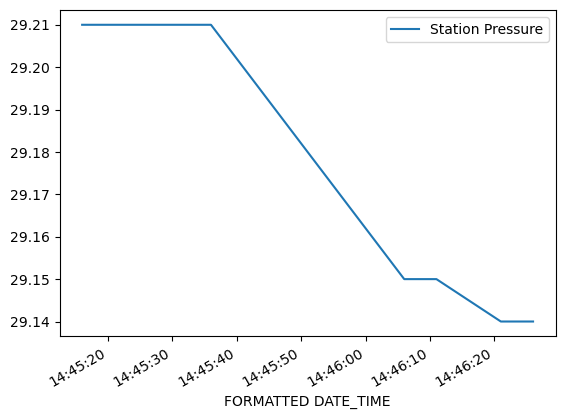

In [3]:
"""EXPLORATORY DATA ANALYSIS"""
kestrel_pd.plot("FORMATTED DATE_TIME", "Temperature")
plt.show()

kestrel_pd[2:].plot("FORMATTED DATE_TIME", "Station Pressure")
plt.show()

In [4]:
""" Show statistics of the various columns. """
kestrel_pd.describe()

,FORMATTED DATE_TIME,Temperature,Relative Humidity,Station Pressure,Heat Index,Dew Point,Density Altitude,Location description,Location address,Location coordinates,Notes
count,16,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,0.0,0.0,0.0,0.0
mean,2025-09-19 14:45:44.125000192,74.118750,40.406250,29.185625,72.068750,48.543750,1972.750000,NaN,NaN,NaN,NaN
min,2025-09-19 14:45:06,72.500000,39.600000,29.140000,70.700000,46.900000,1824.000000,NaN,NaN,NaN,NaN
25%,2025-09-19 14:45:24.750000128,73.050000,39.850000,29.157500,71.350000,48.075000,1875.250000,NaN,NaN,NaN,NaN
50%,2025-09-19 14:45:43.500000,74.300000,40.150000,29.195000,72.100000,48.400000,1970.500000,NaN,NaN,NaN,NaN
75%,2025-09-19 14:46:02.249999872,74.950000,40.650000,29.210000,72.750000,49.175000,2053.500000,NaN,NaN,NaN,NaN
max,2025-09-19 14:46:26,75.900000,43.200000,29.220000,73.800000,50.500000,2174.000000,NaN,NaN,NaN,NaN
std,NaN,1.143223,0.923377,0.029658,0.961054,0.969514,112.779726,NaN,NaN,NaN,NaN


In [5]:
""" Estimate building height using the min/max pressure """
# set constants
Rd = 287 # J/kg/K
g = 9.806 # m/s/s
T = kestrel_pd['Temperature'].mean() # C
P = kestrel_pd['Station Pressure'].mean() # hPa
Pmin = kestrel_pd['Station Pressure'].min() # hPa
Pmax = kestrel_pd['Station Pressure'].max() # hPa

# convert to MKS
T = (T-32)/1.8 + 273.15
P = P * 33.8639
Pmin = Pmin * 33.8639
Pmax = Pmax * 33.8639

# calculate the change in height
dP = Pmin - Pmax
dz = -(Rd*T/g)*(dP/P)

m_to_ft = 3.2808399 # ft/m

print(f"The building height is {dz:2.2f} m, or {dz*m_to_ft:2.2f} ft")

The building height is 23.79 m, or 78.05 ft


In [6]:
""" Estimate dp """

# calculate the change in pressure between measurements
kestrel_pd['dP'] = kestrel_pd['Station Pressure'].diff()*33.8639 # hPa

# set the first value to zero (instead of NaN)
kestrel_pd.loc[0,'dP'] = 0

# show the first part of the new dP column
kestrel_pd['dP'].head()

0    0.000000
1    0.000000
2   -0.338639
3    0.000000
4    0.000000
Name: dP, dtype: float64

In [7]:
# calculate the average pressure between adjacent measurements
kestrel_pd['Pavg'] = 0.5*(kestrel_pd['Station Pressure'].shift(0) + kestrel_pd['Station Pressure'].shift(1))*33.8639
kestrel_pd.loc[0,'Pavg'] = kestrel_pd.loc[1,'Pavg'] # set the first value to the first actual value
kestrel_pd['Pavg'].head()

0    989.503158
1    989.503158
2    989.333839
3    989.164519
4    989.164519
Name: Pavg, dtype: float64

In [8]:
""" Calculate the changes in height. """
# calculate using the hypsometric relationship, also converting temperature to K on the fly
kestrel_pd['dz'] = -(Rd*((kestrel_pd['Temperature'] - 32)/1.8 + 273.15)/g)*(kestrel_pd['dP']/kestrel_pd['Pavg']) # m
# show the first few rows of height change
kestrel_pd['dz'].head()


0   -0.000000
1   -0.000000
2    2.964069
3   -0.000000
4   -0.000000
Name: dz, dtype: float64

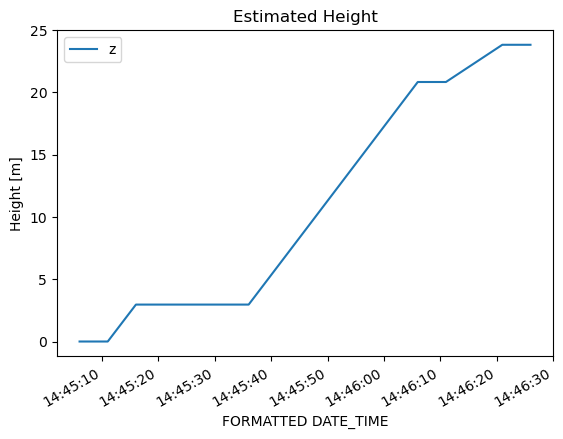

In [11]:
""" Estimate the relative height of each measurement """

# estimated height is the cumulative sum of height changes
kestrel_pd['z'] = kestrel_pd['dz'].cumsum()

# plot height as a function of time
fig, ax = plt.subplots()
kestrel_pd.plot('FORMATTED DATE_TIME', 'z', ax = ax)
ax.set_title('Estimated Height')
ax.set_ylabel("Height [m]")
plt.show()